<a href="https://colab.research.google.com/github/ASi-F/NLPlay-Checkpoint-1/blob/main/Logistic_Regression_with_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

torchvision is the library used for worki g with images in pytorch and provides helper classses to download datasets like MNIST automaically<br>
MNIST contains 60,000 images for training and 10,000 images for testing

In [ ]:
import torch
import torchvision 
from torchvision.datasets import MNIST

In [ ]:
dataset = MNIST(root = 'data/', download = True)

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw




Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
len(dataset) #dataset of 60,000 images

60000

In [ ]:
test_dataset = MNIST(root = 'data/', train = False)
len(test_dataset) #test_dataset of 10,000 images

10000

In [ ]:
dataset[0]
# eveiry element in dataset is a tuple consisting of an image and its tag

(<PIL.Image.Image image mode=L size=28x28 at 0x7F811E696250>, 5)

# using matplotlib to display the image
lines beginning with % are called magic commands, are used to configure the behavior of jupyter. 

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

Label: 9


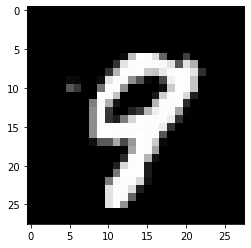

In [ ]:
import random
image, label = dataset[random.randint(0,len(dataset))]
plt.imshow(image, cmap = 'gray')
print('Label:', label)

We want pytorch to work with  images and hence we are imorting some transforms. <br>
As of now the images are in a format called pillow. We use the **ToTensor** transform to convert the images into PyTorch tensors

In [ ]:
import torchvision.transforms as transforms

In [ ]:
dataset = MNIST(root = 'data/',
                train = True,
                transform = transforms.ToTensor())
test_dataset = MNIST(root = 'data/',
                train = False,
                transform = transforms.ToTensor())
len(dataset)

60000

In [ ]:
img_tensor, label = dataset[0]
print(img_tensor.shape,label)

torch.Size([1, 28, 28]) 5


the image is now a 1\*28\*28 tensor corresponding to 28\*28 pixels and grayscale values of 0 and 1

In [ ]:
print(img_tensor[0,10:15,10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
        [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
        [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
        [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
        [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]])
tensor(1.) tensor(0.)


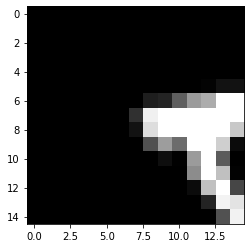

In [ ]:
# plotting image stored in tensor
plt.imshow(img_tensor[0,:15,:15], cmap = 'gray')

# Traing an dvalidating
The dataset is sually split into 3 part:
- **Training set** used to train the model
- **Validation set** used to evaluate the model (like practice test cases)
- **Test set** used to compare the model efficiency against this standardized set
There are 60k training images and 10k test images, we split the training set into into 50k for training and 10k for validation using random_split method from PyTorch

In [ ]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000,10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [ ]:
# creating data loaders to help load data in batches
from torch.utils.data import DataLoader

batch_size = 100

train_loader = DataLoader(train_ds, batch_size, shuffle= True)
val_loader = DataLoader(val_ds, batch_size) 

# What have we defined till now?
We created a **dataset** of MNIST conisting of tuples of image tensors and and labels<br>
Created a **test_dataset** of 10k images and labels <br>
Created a **train_ds** and a **val_ds** by splitting the dataset into 50k and 10k examples randomly <br>
Created **DataLoaders train_loader and val_loader**  for **train_ds** and **val_ds** by spliiting into shuffled batches of size 100.<br>
Each element of the dataloader is a set batchsize number of of 1X28X28 image tensors and labels

# Model 
- logistic regression is similar to linear regression. pred = x @ w.t() + b
- we will still use nn.Linear to create weights biases and forward() functions
- Every image needs to bflattened to a pulp, a linear vector 
- There are total of 28\*28 features corresponding to each image and a total of 10 outputs corresponing to the linear model
- The outputs are converted to the probabilies with help of softmax function
- The loss function accordingly is using logarithm. summation(target\*log(pred)) for each image this is called **cross_entropy**

In [ ]:
import torch.nn as nn

input_size = 28*28 
num_classes = 10

model = nn.Linear(input_size,num_classes)

In [ ]:
print(model.weight.shape)
print(model.bias.shape)

torch.Size([10, 784])
torch.Size([10])


In [ ]:
for images,labels in train_loader:
    print(images.shape)
    print(labels.shape)
    break

torch.Size([100, 1, 28, 28])
torch.Size([100])


# Creating a new model derived from nn.Linear
Now nn.linear works only with vectors an our data points here aare matrices.<br>
Hence we derive a new model class from nn.Linear in order to account for this.<br>
Inside the _ \_init_ \_ constructor method, we instantiate the weights and biases using nn.Linear. And inside the forward method, which is invoked when we pass a batch of inputs to the model, we flatten the input tensor and pass it into self.linear.<br>

In [ ]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1,input_size)
        out = self.linear(xb)
        return out

model = MnistModel()

In [ ]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

In [ ]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[ 0.0232, -0.0262,  0.0210,  ...,  0.0105,  0.0108,  0.0004],
         [-0.0009,  0.0106, -0.0341,  ...,  0.0268,  0.0124, -0.0240],
         [-0.0344,  0.0317,  0.0160,  ...,  0.0059,  0.0138,  0.0040],
         ...,
         [-0.0041,  0.0086,  0.0197,  ..., -0.0063,  0.0190,  0.0260],
         [ 0.0041,  0.0059,  0.0315,  ...,  0.0147, -0.0186, -0.0301],
         [-0.0073,  0.0272, -0.0349,  ...,  0.0132, -0.0086,  0.0090]],
        requires_grad=True), Parameter containing:
 tensor([-0.0201,  0.0323, -0.0343, -0.0079, -0.0270, -0.0139, -0.0006, -0.0178,
         -0.0322, -0.0050], requires_grad=True)]

# Cost funnction and conversion of predictions into probabilities

In [ ]:
import torch.nn.functional as F

In [ ]:
for images, labels in train_loader:
    outputs = model(images)
    break

print('outputs contains the set of 10 outputs for each image in the batch')
print(outputs.shape)

outputs contains the set of 10 outputs for each image in the batch
torch.Size([100, 10])


In [ ]:
print('10 outputs for first image : ',(outputs[0]),sep = '\n')

10 outputs for first image : 
tensor([-0.1864, -0.1175,  0.0744, -0.0803,  0.0243,  0.1138,  0.2652,  0.0395,
        -0.1258,  0.0260], grad_fn=<SelectBackward>)


In [ ]:
# applying softmax to calculate probability corresponding to each output
probs = F.softmax(outputs, dim = 1)

# probabilities of the number in image being corresponding to each number from 0 - 10
print(probs[0].data)

# total probability
print('Sum:', torch.sum(probs[0]).item())

tensor([0.0820, 0.0879, 0.1065, 0.0912, 0.1013, 0.1108, 0.1289, 0.1028, 0.0872,
        0.1015])
Sum: 1.0000001192092896


In [ ]:
# time to check our bull shit predictions
max_probs, preds = torch.max(probs, dim=1)
print(preds)
for images,labels in train_loader:
    print(labels)
    break

tensor([6, 7, 5, 8, 5, 8, 3, 4, 8, 4, 4, 8, 8, 7, 7, 5, 0, 7, 7, 5, 5, 4, 3, 0,
        2, 5, 7, 5, 7, 0, 7, 7, 5, 8, 4, 7, 0, 7, 4, 9, 7, 5, 5, 7, 7, 7, 0, 3,
        4, 3, 6, 9, 8, 0, 3, 5, 6, 5, 8, 2, 7, 8, 7, 8, 4, 6, 6, 7, 6, 3, 3, 6,
        0, 5, 7, 5, 3, 1, 7, 0, 7, 5, 3, 8, 5, 6, 3, 7, 5, 3, 7, 0, 0, 5, 5, 6,
        0, 5, 2, 7])
tensor([6, 8, 3, 8, 3, 5, 6, 6, 1, 9, 9, 7, 2, 1, 0, 2, 6, 0, 1, 8, 4, 9, 0, 2,
        9, 7, 6, 3, 9, 2, 1, 1, 1, 2, 1, 2, 4, 4, 8, 3, 0, 0, 3, 5, 3, 9, 7, 8,
        6, 2, 2, 3, 1, 3, 1, 7, 0, 3, 4, 3, 0, 0, 9, 9, 0, 4, 0, 1, 6, 5, 3, 1,
        0, 9, 0, 7, 9, 2, 3, 9, 0, 6, 3, 1, 4, 1, 0, 5, 8, 2, 8, 0, 5, 3, 9, 2,
        8, 0, 7, 3])


In [ ]:
# calculating accuracy
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim =1)
    return torch.sum(preds == labels) / len(preds)

# preds == labels is a r=tensor of same shape as both, having 1 where
# elements are equal and 0 where unequal

In [ ]:
accuracy(outputs, labels)

tensor(0.0700)

In [ ]:
cost_fn = F.cross_entropy

In [ ]:
# Loss for current data batch
loss = cost_fn(outputs, labels)
print(loss)
print('here e^-loss is the probabilty of the output being right')

tensor(2.3231, grad_fn=<NllLossBackward>)
here e^-loss is the probabilty of the output being right


# Training the model

In [ ]:
def fit(model,cost_fn,lr,train_loader,val_loader,opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    thr = 1e-1
    for i in range(100):
        for images, labels in train_loader:
            # 1. Calculate predictions
            preds = model(images)
            loss = cost_fn(preds, labels)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()            

In [ ]:
def valid8(model, test_dataset):
    hist = []
    t_count = []
    for a0 in range(10):
      hist.append(0)
      t_count.append(0)
    acc = 0
    count = 0
    for i in range(len(test_dataset)):
        image, label = test_dataset[i]
        x = image.unsqueeze(0)
        y = model(x)
        _, preds = torch.max(y,dim=1)
        if preds[0].item()==label:
            acc += 1
            hist[label]+=1
        count+=1
        t_count[label]+=1
    acc /= count
    for i in range(10):
      hist[i] /= t_count[i]
    return acc,hist

In [ ]:
fit(model,cost_fn,1e-3,train_loader,val_loader)

In [ ]:
acc, hist = valid8(model,test_dataset)
import copy
temp = copy.copy(hist)
temp.sort()
print(acc*100,'%')
for i in range(10):
  print(hist.index(temp[i]),': ',temp[i]*100,'%')

90.08 %
5 :  82.62331838565022 %
2 :  85.17441860465115 %
8 :  86.24229979466119 %
9 :  86.7195242814668 %
3 :  89.10891089108911 %
7 :  89.2023346303502 %
4 :  91.85336048879837 %
6 :  93.42379958246346 %
1 :  97.18061674008811 %
0 :  97.95918367346938 %


In [ ]:
def testing():
    exm = test_dataset[random.randint(0,len(test_dataset))]
    plt.imshow(exm[0][0], cmap = 'gray')
    x = exm[0].unsqueeze(0)
    y = model(x)
    _, preds = torch.max(y, dim=1)
    if preds[0].item()== exm[1]:
        testing()
    else:
        print(preds[0].item(),exm[1])

0 5


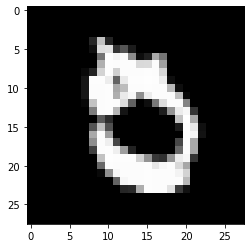

In [ ]:
testing()